In [1]:
import pandas as pd

games = pd.read_csv('/datasets/games.csv')

games.head()
#Nomes das colunas
#Valores ausentes 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
#Quantidade de linhas e colunas
#Tipos de dados (int, float, object)
#Quais colunas têm valores ausentes
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#Média,Mediana,Valores mínimos e máximos e Possíveis outliers
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


o dataset contem 16715 entries, 0 to 16714 Data columns, existem colunas numericas relacionadas a vendas por país. Algumas colunas apresentam valores ausentes como Critic_Score, User_Score e Rating.

In [4]:
#ETAPA 2
#Os nomes das colunas foram convertidos para letras minúsculas para padronização e para facilitar o acesso aos dados durante a análise,
#evitando erros causados por diferenciação entre maiúsculas e minúsculas.
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['year_of_release'] = games['year_of_release'].astype('Int64')
games.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


A coluna user_score continha valores não numéricos, como a abreviação tbd (“to be determined”). Para garantir uma conversão segura para valores numéricos, foi utilizado o método pd.to_numeric() com o parâmetro errors='coerce', que converte automaticamente valores inválidos em NaN.

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

# Por que os valores estão ausentes?
Possíveis razões:
Jogos antigos não tinham avaliações registradas
Jogos pouco populares não receberam avaliações suficientes
Jogos lançados recentemente (especialmente em 2016) ainda não tinham notas definidas
A classificação ESRB (rating) pode não existir para todos os mercados

In [8]:
games['total_sales'] = (
    games['na_sales'] +
    games['eu_sales'] +
    games['jp_sales'] +
    games['other_sales']
)
games[['name', 'platform', 'total_sales']].head()


,name,platform,total_sales
0,Wii Sports,Wii,82.54
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.38


In [9]:
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Foi criada a coluna total_sales, que representa o total de vendas globais de cada jogo, obtido pela soma das vendas nas regiões da América do Norte, Europa, Japão e outras regiões.

In [10]:
games_per_year = games.groupby('year_of_release')['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

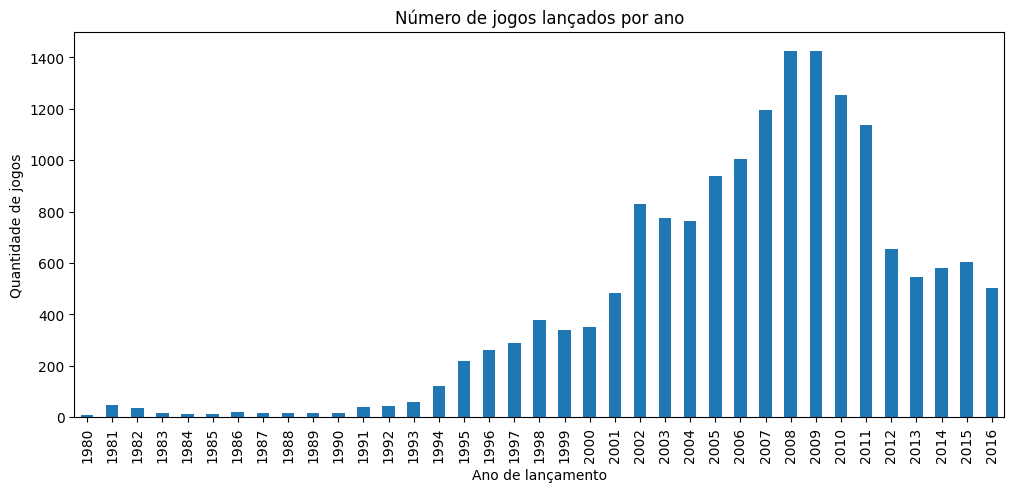

In [11]:
import matplotlib.pyplot as plt

games_per_year.plot(kind='bar', figsize=(12, 5))
plt.title('Número de jogos lançados por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade de jogos')
plt.show()


Observa-se que o número de jogos lançados por ano é significativamente menor nos primeiros anos do conjunto de dados. A partir de aproximadamente 2000, a quantidade de lançamentos cresce de forma consistente, indicando maior confiabilidade dos dados.


In [12]:
platform_sales = (
    games.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

platform_sales


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [13]:
top_platforms = platform_sales.head(10).index
top_platforms


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

In [14]:

platform_year_sales = (
    games[games['platform'].isin(top_platforms)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack()
)

platform_year_sales



platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


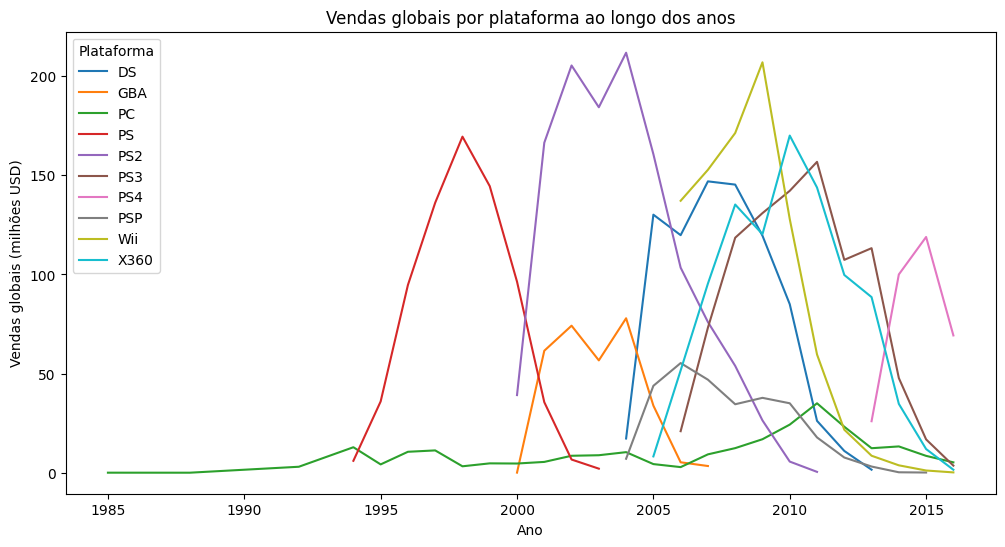

In [15]:

platform_year_sales.plot(figsize=(12, 6))
plt.title('Vendas globais por plataforma ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Vendas globais (milhões USD)')
plt.legend(title='Plataforma')
plt.show()



Observa-se que plataformas como PS2 e Xbox 360 dominaram as vendas globais durante vários anos, mas posteriormente perderam relevância. Novas plataformas, como PS4 e Xbox One, surgem e passam a liderar as vendas mais recentemente.

Em média, o ciclo de vida de uma plataforma parece durar cerca de 7 a 10 anos, desde seu lançamento até a queda significativa nas vendas.

In [16]:
max_year = games['year_of_release'].max()

recent_games = games[games['year_of_release'] >= max_year - 5]
recent_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


In [17]:

recent_platform_sales = (
    recent_games
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

recent_platform_sales


platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

In [18]:
Estas concentram a maior parte das vendas e devem ser o foco:

PS3

X360

PS4

3DS

XOne

SyntaxError: invalid syntax (559256609.py, line 1)

In [ ]:
main_platforms = ['PS3', 'X360', 'PS4', '3DS', 'XOne']

genre_platform_sales = (
    recent_games[recent_games['platform'].isin(main_platforms)]
    .groupby(['platform', 'genre'])['total_sales']
    .sum()
    .unstack()
)

genre_platform_sales


Quanto cada gênero vendeu em cada plataforma
Consoles de mesa, como PS3, PS4, X360 e XOne, apresentam forte concentração de vendas nos gêneros Action e Shooter, refletindo a preferência do mercado ocidental.
Em contraste, o Nintendo 3DS destaca-se no gênero Role-Playing, indicando maior aderência do público a jogos narrativos e portáteis.

In [ ]:
#ETAPA 4
regions = {
    'NA': 'na_sales',
    'EU': 'eu_sales',
    'JP': 'jp_sales'
}

top_platforms_region = {}

for region, column in regions.items():
    top_platforms_region[region] = (
        games
        .groupby('platform')[column]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

top_platforms_region


América do Norte (NA):
Forte domínio de PS3, X360 e PS4
Consoles da Microsoft têm maior participação
Europa (EU):
PS3 e PS4 dominam
Mercado semelhante ao NA, porém com menor participação do Xbox
Japão (JP):
Forte presença de 3DS e PS3
Consoles portáteis têm maior relevância

In [ ]:
#genereos mais populares por região
top_genres_region = {}

for region, column in regions.items():
    top_genres_region[region] = (
        games
        .groupby('genre')[column]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

top_genres_region


NA / EU: predominância de Action, Shooter e Sports
JP: destaque para Role-Playing, seguido por Action
jogos narrativos e RPGs têm maior aceitação no mercado japonês, enquanto gêneros competitivos dominam mercados ocidentais.

In [ ]:
esrb_region_sales = (
    games
    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
)

esrb_region_sales


Classificações E (Everyone) e T (Teen) lideram em NA e EU
No JP, a influência da ESRB é menor
Jogos M (Mature) vendem mais no ocidente
a classificação etária afeta vendas principalmente em mercados ocidentais.

In [ ]:
from scipy import stats

alpha = 0.05

xone_scores = games[
    (games['platform'] == 'XOne') & (games['user_score'].notna())
]['user_score']

pc_scores = games[
    (games['platform'] == 'PC') & (games['user_score'].notna())
]['user_score']

t_stat, p_value = stats.ttest_ind(
    xone_scores,
    pc_scores,
    equal_var=False
)

p_value


Nível de significância escolhido: α = 5%
As médias das avaliações dos usuários são iguais

In [ ]:
action_scores = games[games['genre'] == 'Action']['user_score']
sports_scores = games[games['genre'] == 'Sports']['user_score']

t_stat, p_value = stats.ttest_ind(
    action_scores.dropna(),
    sports_scores.dropna(),
    equal_var=False
)

p_value


O mercado de videogames apresenta diferenças significativas entre regiões. América do Norte e Europa compartilham padrões semelhantes de consumo, com predominância de consoles de mesa e gêneros como Action e Shooter. Em contraste, o Japão demonstra forte preferência por jogos de Role-Playing e plataformas portáteis.

As classificações etárias influenciam as vendas principalmente nos mercados ocidentais, enquanto no Japão esse impacto é menos evidente.

Os testes estatísticos realizados indicaram que, em alguns casos, as diferenças observadas visualmente não são estatisticamente significativas, reforçando a importância do uso de métodos estatísticos na tomada de decisão baseada em dados.